In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../../Data/기상청/기상청.csv'

pd.read_csv(path, encoding='utf-8', skiprows=11)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1
1,108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0
2,108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6
3,108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0
4,108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2
...,...,...,...,...,...,...,...,...,...
360,108,서울,2023-12-27,1.5,6.8,15:49,-2.8,08:13,9.6
361,108,서울,2023-12-28,1.2,4.4,14:53,-1.7,06:20,6.1
362,108,서울,2023-12-29,1.3,4.6,14:38,-1.5,07:25,6.1
363,108,서울,2023-12-30,0.6,2.1,23:54,-0.9,02:37,3.0


In [3]:
raw = pd.read_csv(path, parse_dates=['일시'], encoding='utf-8', skiprows=11)

In [4]:
df = raw.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   		지점번호   365 non-null    int64         
 1   지점명      365 non-null    object        
 2   일시       365 non-null    datetime64[ns]
 3   평균기온(℃)  365 non-null    float64       
 4   최고기온(℃)  365 non-null    float64       
 5   	최고기온시각  365 non-null    object        
 6   최저기온(℃)  365 non-null    float64       
 7   최저기온시각   365 non-null    object        
 8   일교차      365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 25.8+ KB


In [5]:
df.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1
1,108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0
2,108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6
3,108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0
4,108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2


In [6]:
df['일시']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
360   2023-12-27
361   2023-12-28
362   2023-12-29
363   2023-12-30
364   2023-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [7]:
df['월별'] = df['일시'].dt.month

In [8]:
df.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,월별
0,108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1,1
1,108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0,1
2,108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6,1
3,108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0,1
4,108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2,1


In [9]:
df['일별'] = df['일시'].dt.day

In [10]:
df.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,월별,일별
0,108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1,1,1
1,108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0,1,2
2,108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6,1,3
3,108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0,1,4
4,108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2,1,5


In [11]:
df.columns

Index(['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각', '일교차', '월별', '일별'],
      dtype='object')

In [12]:
df.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,월별,일별
0,108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1,1,1
1,108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0,1,2
2,108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6,1,3
3,108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0,1,4
4,108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2,1,5


In [13]:
df['월별']

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: 월별, Length: 365, dtype: int32

In [14]:
df.groupby('월별')['평균기온(℃)'].agg('mean')

result = df.groupby('월별')['평균기온(℃)'].agg('mean')

result[:5]

월별
1    -1.522581
2     2.300000
3     9.780645
4    13.800000
5    19.522581
Name: 평균기온(℃), dtype: float64

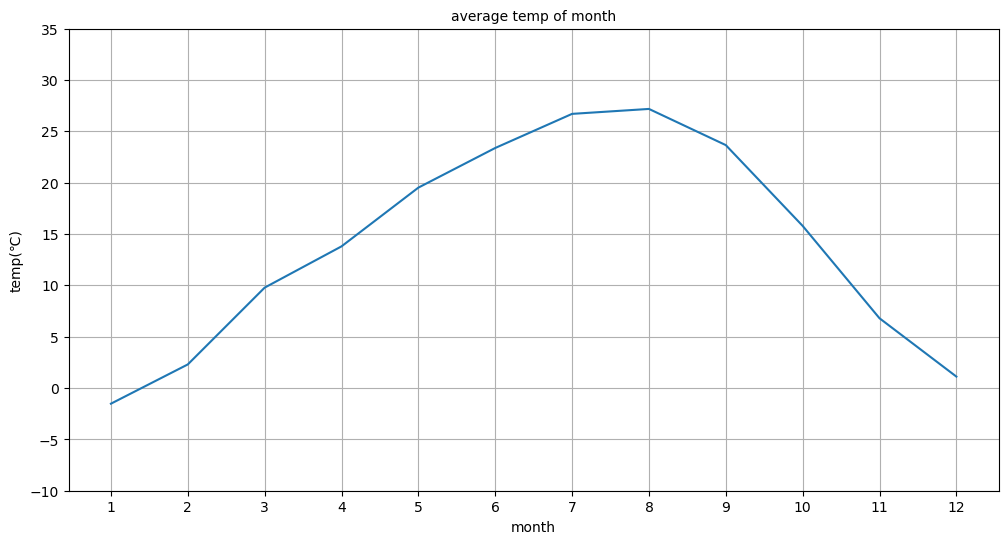

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(result.index, result.values)

ax.set_title('average temp of month', size=10)
ax.set_xlabel('month')
ax.set_ylabel('temp(℃)')
plt.xticks(ticks=range(1, 13))
plt.yticks(ticks=range(-10, 40, 5))

plt.grid(True)
plt.show()

In [16]:
month01 = df[(df['월별'] == 1)]
month02 = df[(df['월별'] == 2)]
month03 = df[(df['월별'] == 3)]
month04 = df[(df['월별'] == 4)]
month05 = df[(df['월별'] == 5)]
month06 = df[(df['월별'] == 6)]
month07 = df[(df['월별'] == 7)]
month08 = df[(df['월별'] == 8)]
month09 = df[(df['월별'] == 9)]
month10 = df[(df['월별'] == 10)]
month11 = df[(df['월별'] == 11)]
month12 = df[(df['월별'] == 12)]

Text(0, 0.5, 'temp(℃)')

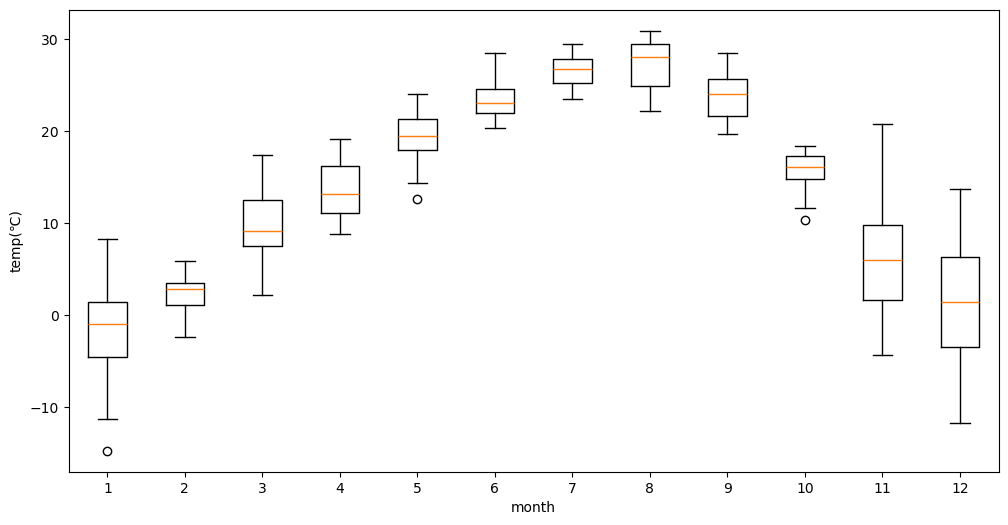

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

box = ax.boxplot(x = [month01['평균기온(℃)'],
                  month02['평균기온(℃)'],
                  month03['평균기온(℃)'],
                  month04['평균기온(℃)'],
                  month05['평균기온(℃)'],
                  month06['평균기온(℃)'],
                  month07['평균기온(℃)'],
                  month08['평균기온(℃)'],
                  month09['평균기온(℃)'],
                  month10['평균기온(℃)'],
                  month11['평균기온(℃)'],
                  month12['평균기온(℃)']])

ax.set_xlabel('month')
ax.set_ylabel('temp(℃)')


In [18]:
df['일시']

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
360   2023-12-27
361   2023-12-28
362   2023-12-29
363   2023-12-30
364   2023-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [39]:
df['일별'].index


RangeIndex(start=0, stop=365, step=1)

TypeError: 'str' object cannot be interpreted as an integer

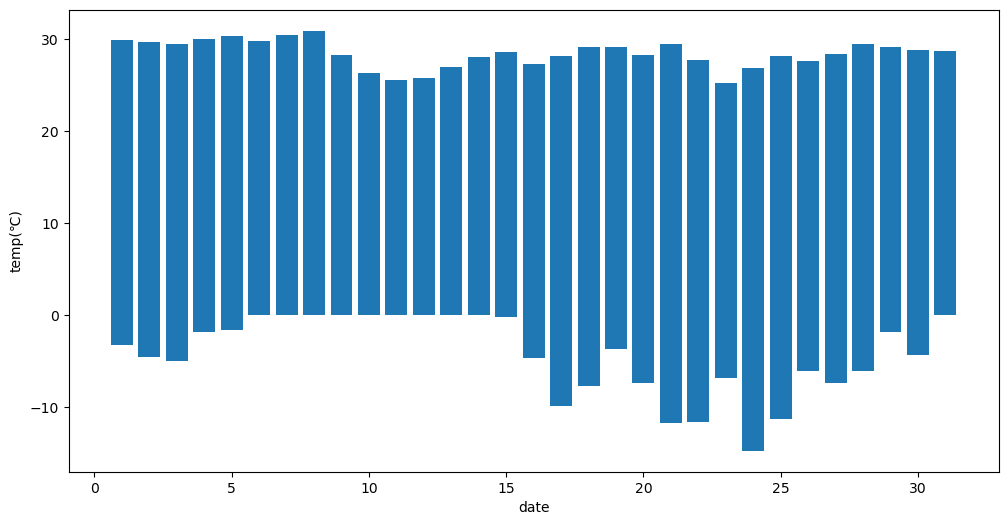

In [36]:
# fig, ax = plt.subplots(figsize=(12,6))

# ax.bar(df['일별'], df['평균기온(℃)'])
# plt.xlabel('date')
# plt.ylabel('temp(℃)')
# plt.xticks(ticks=range('2023-01-01', '2023-12-31', 10))